In [1]:
import pandas as pd
import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import time
from sklearn.decomposition  import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

sys.path.append('/Users/scinawa/workspace/grouptheoretical/new-experiments/multi-orbit-bispectrum')

from spectrum_utils import *
import numpy as np
import warnings



rand_state = 42
#tf.random.set_seed(rand_state)
np.random.seed(rand_state)




This is the standard example

In [2]:
G1 = nx.Graph()
G2 = nx.Graph()

n = 9

G1.add_nodes_from([i for i in range(n)])
G1.add_edges_from([ (i, (i+1)% (n)) for i in range(n) ])
G1.add_edges_from([ (i, (i+2)% (n)) for i in range(n) ])

G2.add_nodes_from([i for i in range(n)])
G2.add_edges_from([ (i, (i+1)% (n)) for i in range(n) ])
G2.add_edges_from([ (i, (i+3)% (n)) for i in range(n) ])

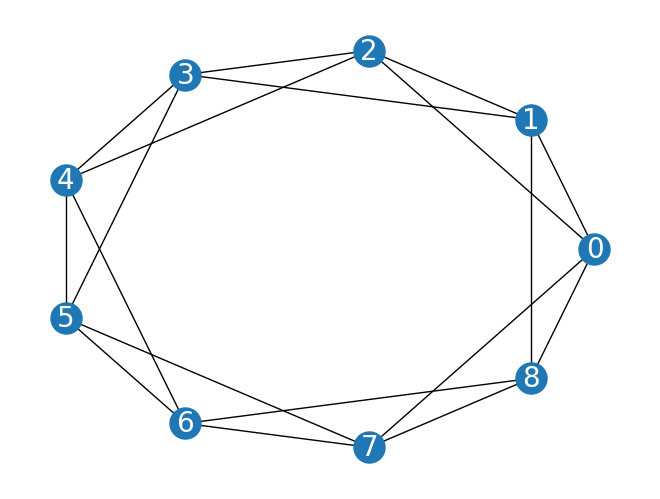

In [3]:
nx.draw_circular(G1, with_labels=True, node_size=500, font_size=20, font_color="white")

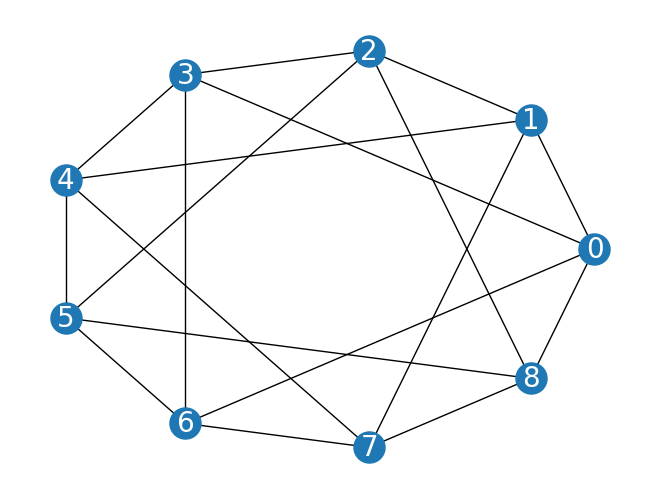

In [4]:
nx.draw_circular(G2, with_labels=True, node_size=500, font_size=20, font_color="white")

In [5]:
kcor1orb_G1 = []
#kcor2orb_G1 = []
kcor1orb_G2 = []
#kcor2orb_G2 = []
for k in range(2,8):
	func_1o_G1 = create_func_on_group_from_matrix_1orbit(np.array(nx.adjacency_matrix(G1).todense()))
	#func_2o_G1 = create_func_on_group_from_matrix_2orbits(np.array(nx.adjacency_matrix(G1).todense()))
	
	func_1o_G2 = create_func_on_group_from_matrix_1orbit(np.array(nx.adjacency_matrix(G2).todense()))
	#func_2o_G2 = create_func_on_group_from_matrix_2orbits(np.array(nx.adjacency_matrix(G2).todense()))

	kcor1_G1 = reduced_k_correlation(func_1o_G1, k=k, method="extremedyn", vector=True)     # vector = False !!!!!
	#kcor2_G1 = reduced_k_correlation(func_2o_G1, k=k, method="extremedyn", vector=True)
	
	kcor1_G2 = reduced_k_correlation(func_1o_G2, k=k, method="extremedyn", vector=True)     # vector = False !!!!!
	#kcor2_G2 = reduced_k_correlation(func_2o_G2, k=k, method="extremedyn", vector=True)

	kcor1orb_G1.append(kcor1_G1)
	#kcor2orb_G1.append(kcor2_G1)
	kcor1orb_G2.append(kcor1_G2)
	#kcor2orb_G2.append(kcor2_G2)


/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_30093/1548417522.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  func_1o_G1 = create_func_on_group_from_matrix_1orbit(np.array(nx.adjacency_matrix(G1).todense()))
/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_30093/1548417522.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  func_1o_G2 = create_func_on_group_from_matrix_1orbit(np.array(nx.adjacency_matrix(G2).todense()))


In [6]:
print("Graph size {}".format(n))
for i in range(len(kcor1orb_G1)):
    distance = np.linalg.norm(kcor1orb_G1[i] - kcor1orb_G2[i])
    print("1 orbit {} correlation: {} - Distance: {}".format(i+2, np.allclose(kcor1orb_G1[i], kcor1orb_G2[i]), distance))
    print("2 orbit {} correlation:".format(i+2), np.allclose(kcor2orb_G1[i], kcor2orb_G2[i]))

Graph size 9
1 orbit 2 correlation: True - Distance: 0.0


NameError: name 'kcor2orb_G1' is not defined

Experiment on random graphs.

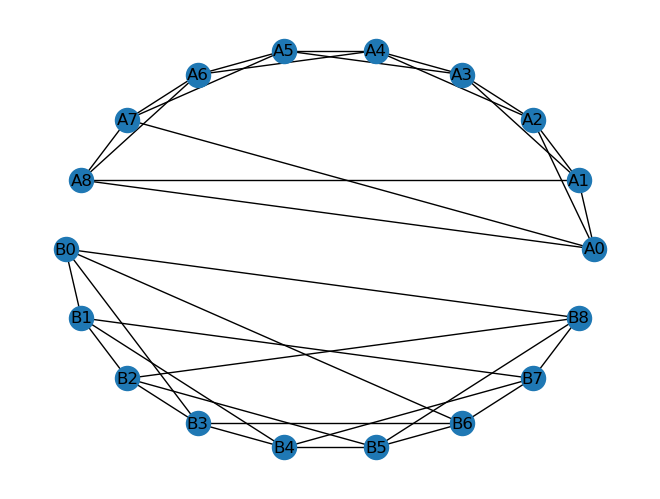

In [ ]:
nx.draw_circular(nx.union(G1, G2, rename=("A", "B")), with_labels=True)
